Learning of the opencv basics from the https://www.youtube.com/watch?v=eLTLtUVuuy4

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read and show of the images

# returns the np array
image  = cv2.imread('test_image.jpg')

cv2.imshow('result', image)
cv2.waitKey(0) # if 0 display window infinitly until an key pressed else add milliseconds in arg

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


### Edge Detection

Identify sharp changes in the intesity in the adjacent pixels. 

In the b&w pic like below for the black color pixels has 0 value and white has 255.
![bw_edge_detect](img\edge_detection.png)

### Gradient

Measure of the change in the brightness over adjecent series of pixels

![gradient](img\gradient.PNG)

### Channels

Each pixels in **color image** are with the 3 combination of the values. R, G, B. 

Whereas **grayscale** has only 1 channel. It has numbers from 0 to 255. Each of them describes the brighthness of the pixels

Processing is faster in grayscale compare to color.

To find the edges and gradient of the lanes image, convert it to grayscale. Becoz it is faster to process

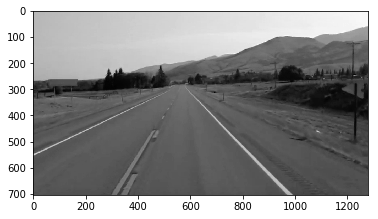

In [42]:
# convert to grayscale
lane_img = np.copy(image)
gray = cv2.cvtColor(lane_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

### Reduce Noise and smoothing

To smooth the image modify the val of pixel val with the avg val of the pixels around it. Avaraging out is performed with the kernel. Usually, kernel has normally distributed numbers. It will be ran around across entire images and sets each pixel values equal to the weighted avarage of its neighboring pixels. The kernel decides the weights of the pixels.

In the image below, the **center pixel is getting smoothed**. And the overlaid numbers are the weights.

![smoothing](img\smoothing.png)


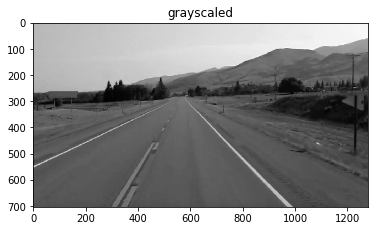

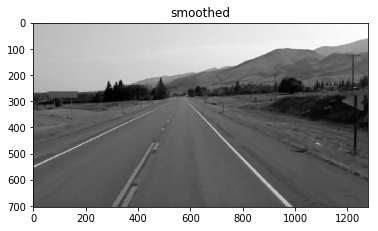

In [15]:
# Here, the Gaussian Filter is used.

plt.imshow(gray, cmap='gray')
plt.title("grayscaled")
plt.show()

# Here, it doesn't show much diff from the original one but blur is applied.
blur = cv2.GaussianBlur(gray, (5,5), 0) # (5,5) is kernel
plt.imshow(blur, cmap='gray')
plt.title("smoothed")
plt.show()

### Edge Detection using Canny()

Measures the adjecent changes in intensity in both X,Y dir of the image. Where X is columns and the Y is rows. It uses dervatives to find the changes. Small derivatives=small changes and big=Big changes.

So using the canny() function it is **counting the gradients**. It **detects the sharp changes in the intensity of the images and highlights it in the image**.

[Canny()](https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html)

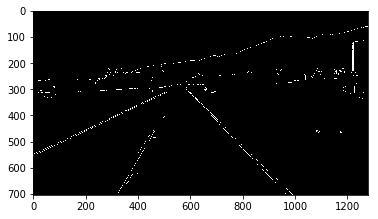

In [19]:
canny = cv2.Canny(blur, 50, 150)
plt.imshow(canny, cmap='gray')
plt.show()

### Find the lane lines

* Find the region of interests: 
    Here, our 1 region of interest is the right side lane in the image. To find that we need to find the triangle like below. Which displays the border of the lanes. The coordinates of ROI based on the image will be (200, height of img-700), (1100, height of img) and the third point is at (550, 250). This coordinates will create the mask of the ROI. It will be used to find the lane lines.
    
![ROI](img\roi.png)

In [24]:
def canny(image):
    gray  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur  = cv2.GaussianBlur(gray, (5,5), 0)
    cny = cv2.Canny(blur, 50, 150)
    return cny

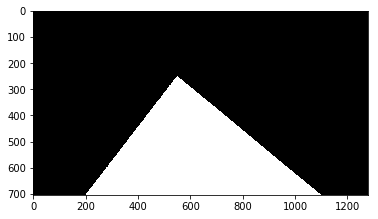

In [30]:
# returns enclosed region
def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([
        [(200, height), (1100, height), (550, 250)] # fillPoly func requires the array of the polygons(Triangles) below. Here, only 1
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    return mask

mask=region_of_interest(canny(image))
plt.imshow(mask, cmap='gray')
plt.show()

So now once we've the mask of ROI, then we can hide all other parts of the images using the mask. To do that we can use bitwise '&' operation. Becoze the white region in the above image has 255 val whereas all black has 0. So in the '&' operations only the white region will stay on the canny image.

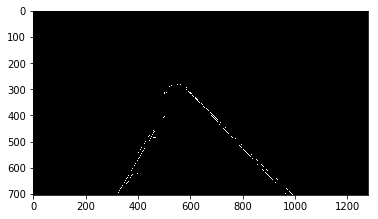

In [31]:
cropped_img = cv2.bitwise_and(canny(image), mask)
plt.imshow(cropped_img, cmap='gray')
plt.show()

### Find the straight lines in the img

Use the **hough transformation**. 

In [40]:
lines = cv2.HoughLinesP(cropped_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
print(lines)

[[[704 418 927 641]]

 [[704 426 791 516]]

 [[320 703 445 494]]

 [[585 301 663 381]]

 [[630 341 670 383]]

 [[794 520 861 591]]

 [[659 371 704 416]]

 [[870 599 939 672]]

 [[767 493 807 534]]

 [[423 509 454 461]]

 [[940 653 991 702]]

 [[824 551 879 609]]

 [[676 389 754 467]]]


### display lines on the original images

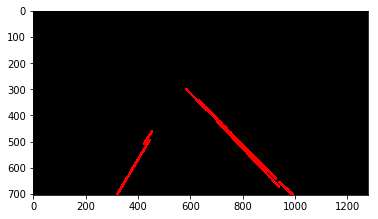

In [39]:
# display lines on the original images
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    # Here the lines are 3-dim 
    if lines is not None:
        for line in lines:
            # print(line) # lines will be 1 row and 3 cols
            x1, y1, x2, y2 = line.reshape(4)
            # (255, 0, 0) BGR format of the line. It will be blue lines. But in the matplot it will be interpreted as RGB. So lines will be red
            cv2.line(line_image, (x1,y1), (x2,y2), (255, 0,0), 10)
    return line_image
    
line_image = display_lines(lane_img, lines)
plt.imshow(line_image)
plt.show()

### Overlay above image on the original colored img

Here, it adds the original image and the above image. Here, the line_image has the black background and only the lines has red color. So when it will be added to the original image, the pixels of the original image will be unchanged for the black part as it has the value 0. Only the 

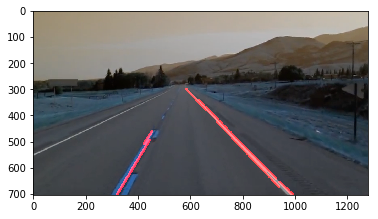

In [43]:
# Here, the lane_image willhave weights 0.8. means the pixel inteinsity in that image will be redued by 20%.
# And for the line_image will be original. So when it is overlaid, the line_image will show better.
combo_image = cv2.addWeighted(lane_img, 0.8, line_image, 1, 1)
plt.imshow(combo_image)
plt.show()